In [122]:
# load a matrix from a space-separated file and show it as an image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import sys
sys.path.append('../..')
from models import ElboGenerativeModelTop
from types import SimpleNamespace


In [123]:
sys.path.append('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/')
from optimise_clnn import eval_paradigms

In [124]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = SimpleNamespace(model='default',
                       enable_q_scale_tuning=False,
                       assume_opt_output_noise=True, 
                       enable_qlpf=False,
                       enable_ylpf=False,
                       paradigm_file='/homes/ar2342/one_more_dir/contextual_frogs/signoffrepertoire1.pkl',
                       noise_injection_node='u',
                       model_tie_lr_weight_decay=True,
                       bs=512,
                       n=128)
model = ElboGenerativeModelTop(device=device, args=args)

In [125]:
ooo = eval_paradigms(model,args.paradigm_file,args)

evaluating paradigm savings with 440 steps
evaluating paradigm AB0 with 270 steps
evaluating paradigm AB1 with 283 steps
evaluating paradigm AB2 with 311 steps
evaluating paradigm AB3 with 382 steps
evaluating paradigm AB4 with 500 steps
evaluating paradigm AB5 with 680 steps
evaluating paradigm herzfeld,z=0.1 with 1125 steps
evaluating paradigm herzfeld,z=0.5 with 1125 steps
evaluating paradigm herzfeld,z=0.9 with 1125 steps


In [127]:
data = {}
params = {}
for i in range(1,17):
    data_ = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/realthing403uuu_finalpredsFX/run{i}_seed1/paradigms.npz')
    params[i] = torch.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/realthing403uuu_finalpredsFX/run{i}_seed1/params.pt', map_location=device)
    data[i] = dict(data_)

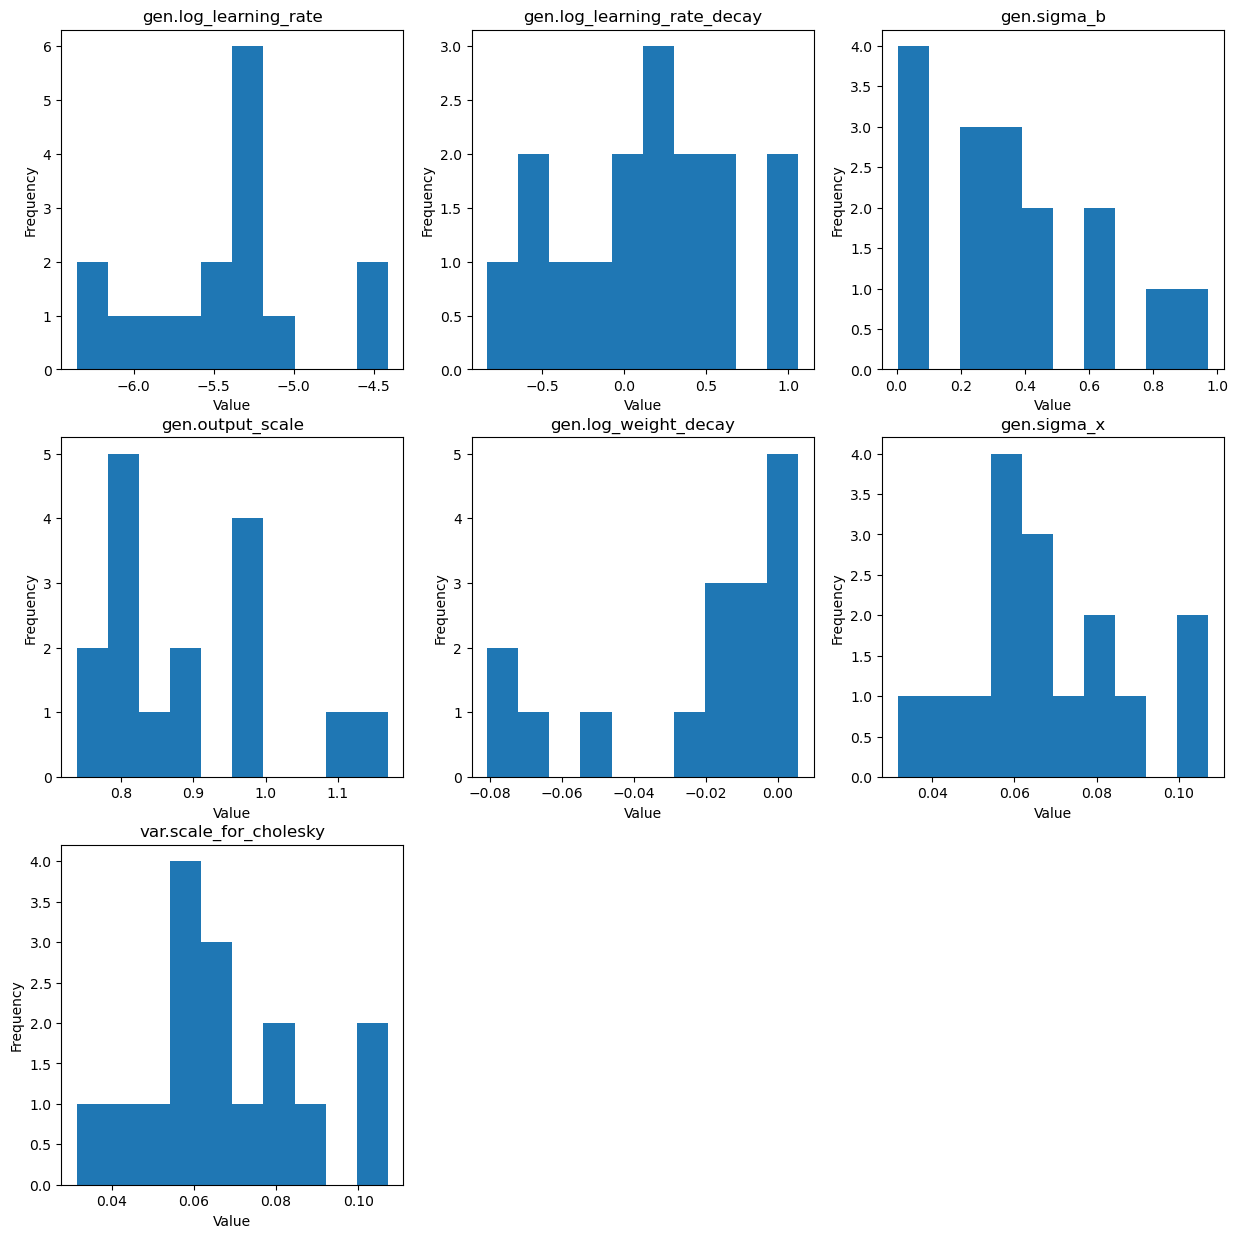

In [135]:
#plot a histogram of every scalar parameter across all runs
plt.figure(figsize=(15,15))
cnt = 0
for uu,param_name in enumerate(params[1].keys()):
    if len(params[1][param_name].squeeze().shape) == 0:  # scalar parameter
        values = [params[i][param_name].item() for i in range(1,17)]
        cnt += 1
        plt.subplot(3, 3, cnt)
        plt.hist(values, bins=10)
        plt.title(f'{param_name}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        # plt.show()

In [ ]:
def mean_per_key(data):
    keys = list(data[1].keys())
    mean_data = {}
    for key in keys:
        all_values = []
        for i in range(1,17):
            all_values.append(data[i][key].mean(axis=1))
        mean_data[key] = np.mean(all_values, axis=0)
    return mean_data

In [ ]:
mean_data = mean_per_key(data)

In [ ]:
mean_data

{'savings': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
 

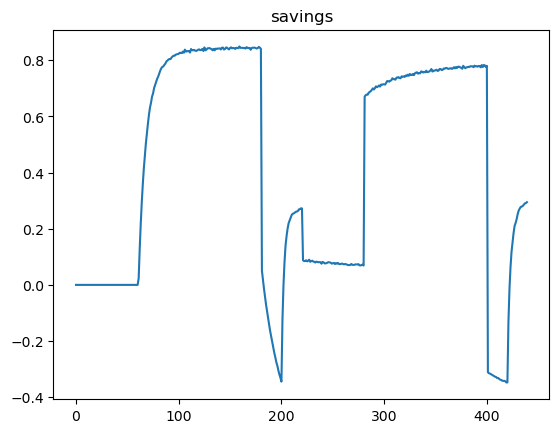

In [ ]:
# for key in data:
for key in mean_data:
    plt.figure()
    plt.title(key)
    plt.plot(mean_data[key])
    break

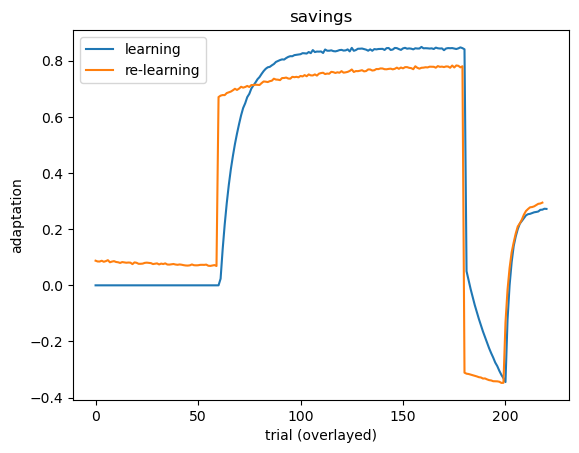

In [ ]:
plt.plot(mean_data['savings'][:221] , label='learning')
plt.plot(mean_data['savings'][221:], label='re-learning')
plt.title('savings')
plt.xlabel('trial (overlayed)')
plt.ylabel('adaptation')
plt.legend()

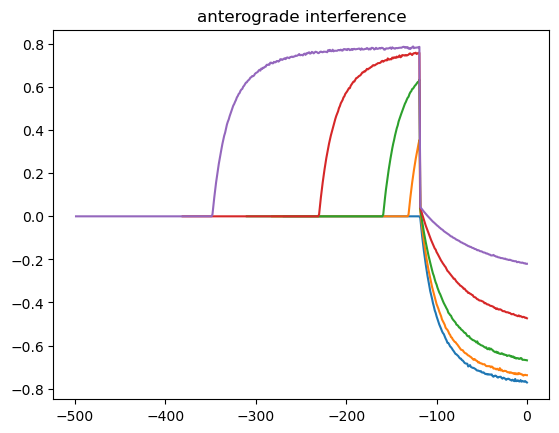

In [ ]:
ant_list = [f'AB{i}' for i in range(0,5)]
plt.figure()
plt.title('anterograde interference')
for ant in ant_list:
    x_data = np.arange(len(mean_data[ant]))
    plt.plot(x_data-np.max(x_data),mean_data[ant])

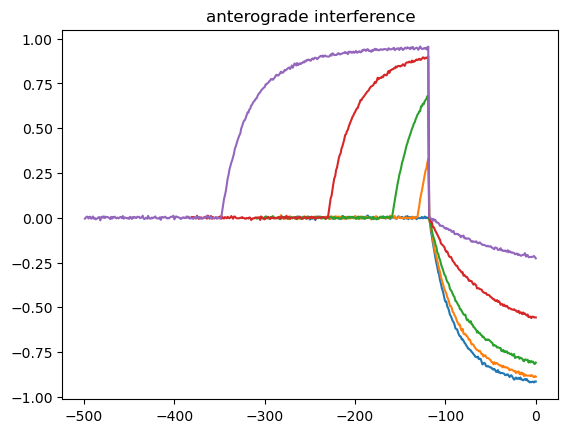

In [ ]:
plt.figure()
plt.title('anterograde interference')
for ant in ant_list:
    x_data = np.arange(len(ooo[ant].mean(axis=1)))
    plt.plot(x_data-np.max(x_data),ooo[ant].mean(axis=1))

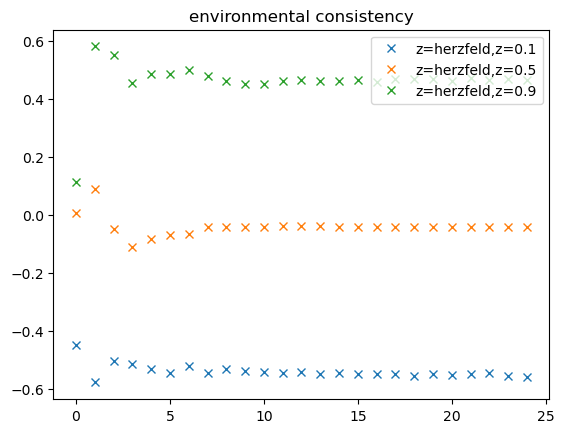

In [ ]:
for iz, z in enumerate(mean_data.keys()):
    if 'herzfeld' not in z:
        continue
    else:
        scenario = z
    deltas = []
    mm = lambda x: np.mean(x,axis=0)
    # scenario = f'herzfeld,z={z}'
    this_result = mean_data[scenario]
    pointer = 0
    for bb in range(25):
        block_length = len(this_result)//25
        pointer += block_length
        deltas.append(this_result[pointer-1]-this_result[pointer-3])
    plt.plot(deltas,'x',label = f'z={z}')
    plt.title('environmental consistency')
plt.legend(loc='upper right')

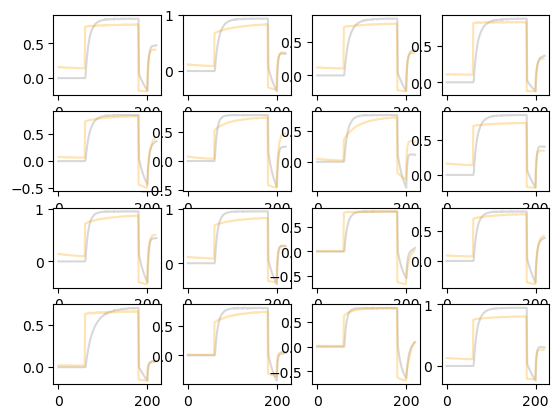

In [ ]:
plt.subplot(4,4,1)
for i, this_data in enumerate(data.values()):
    plt.subplot(4,4,i+1)
    plt.plot(this_data['savings'][:221].mean(axis=1) , color='gray', alpha=0.3)
    plt.plot(this_data['savings'][221:].mean(axis=1), color='orange', alpha=0.3)
# plt.plot(mean_data['savings'][:221] , label='learning')
# plt.plot(mean_data['savings'][221:], label='re-learning')
# plt.title('savings')
# plt.xlabel('trial (overlayed)')
# plt.ylabel('adaptation')
# plt.legend()

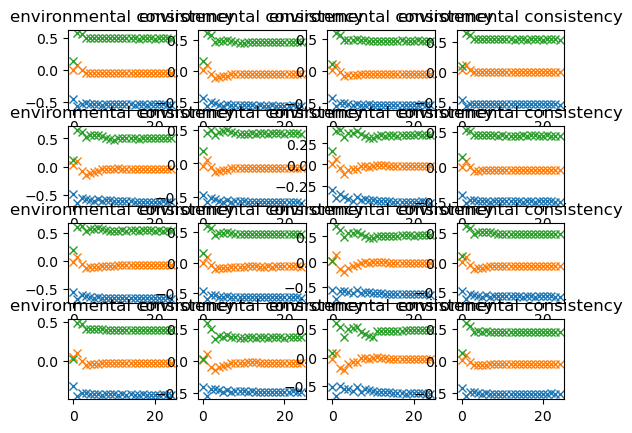

In [ ]:
for i, this_data in enumerate(data.values()):
    plt.subplot(4,4,i+1)
    for iz, z in enumerate(mean_data.keys()):
        if 'herzfeld' not in z:
            continue
        else:
            scenario = z
        deltas = []
        mm = lambda x: np.mean(x,axis=0)
        # scenario = f'herzfeld,z={z}'
        this_result = this_data[scenario].mean(axis=1)
        pointer = 0
        for bb in range(25):
            block_length = len(this_result)//25
            pointer += block_length
            deltas.append(this_result[pointer-1]-this_result[pointer-3])
        plt.plot(deltas,'x',label = f'z={z}')
        plt.title('environmental consistency')
    # plt.legend(loc='upper right')

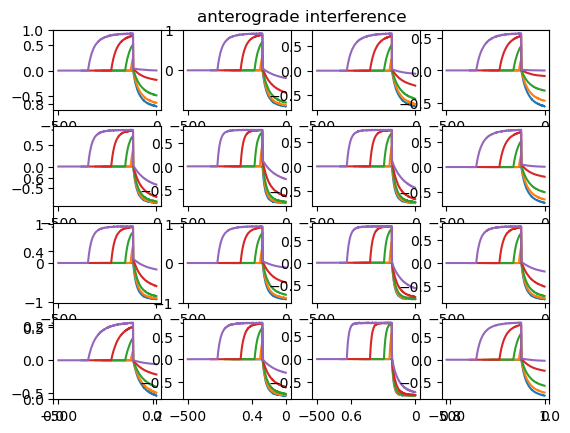

In [ ]:
ant_list = [f'AB{i}' for i in range(0,5)]
plt.figure()
plt.title('anterograde interference')
for i, this_data in enumerate(data.values()):
    plt.subplot(4,4,i+1)
    for ant in ant_list:
        y = this_data[ant].mean(axis=1)
        x_data = np.arange(len(y))
        plt.plot(x_data-np.max(x_data),y)

In [ ]:
def load_adaptation_trace(file_path): 
        df = pd.read_csv(file_path)
        arr = df.Adaptation.to_numpy()
        return arr

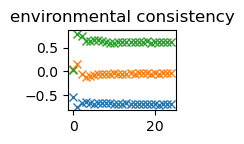

In [ ]:
for i, this_data in enumerate([ooo]):
    plt.subplot(4,4,i+1)
    for iz, z in enumerate(mean_data.keys()):
        if 'herzfeld' not in z:
            continue
        else:
            scenario = z
        deltas = []
        mm = lambda x: np.mean(x,axis=0)
        # scenario = f'herzfeld,z={z}'
        this_result = this_data[scenario].mean(axis=1)
        pointer = 0
        for bb in range(25):
            block_length = len(this_result)//25
            pointer += block_length
            deltas.append(this_result[pointer-1]-this_result[pointer-3])
        plt.plot(deltas,'x',label = f'z={z}')
        plt.title('environmental consistency')
    # plt.legend(loc='upper right')

In [ ]:
LOSS_IS_PER_SAMPLE = False
result_root = '/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/'
coin_bics_path = '/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/coin_bics.txt'
paradigm_ = {k: 'evoked' if k <= 8 else 'spontaneous' for k in range(1,17)}
coin_bics = np.loadtxt(coin_bics_path)
# exp_datasets = [ load_adaptation_trace(f'/homes/ar2342/frogs_project/data/COIN_data/trial_data_{paradigm_[i]}_recovery_participant{(i-1)%8+1}.csv') for i in range(1,17)]
exp_datasets = []
loss_traces= {}
output_traces= {}
prior_out_batch = {}
posterior_out_batch = {}
for i in range(1,17): 
    exp_datasets.append(load_adaptation_trace(f'/homes/ar2342/frogs_project/data/COIN_data/trial_data_{paradigm_[i]}_recovery_participant{(i-1)%8+1}.csv'))
    for j in range(1,6):
        result_dir = f'realthing403uuu_seeds/run{i}_seed{j}' 
        aux_result_dir = f'realthing403finalpreds/run{i}_seed{j}'
        try: 
            loss_traces[(i,j)] = np.genfromtxt(f'{result_root}/{result_dir}/loss.csv', delimiter=',')
            output_traces[(i,j)] = np.loadtxt(f'{result_root}/{result_dir}/pred_a.txt')
            posterior_out_batch[(i,j)] = np.load(f'{result_root}/{aux_result_dir}/pred_a_batch.npz')
            prior_out_batch[(i,j)] = np.load(f'{result_root}/{aux_result_dir}/prior_a_batch.npz')
        except:
            loss_traces[(i,j)] = None
            output_traces[(i,j)] = None

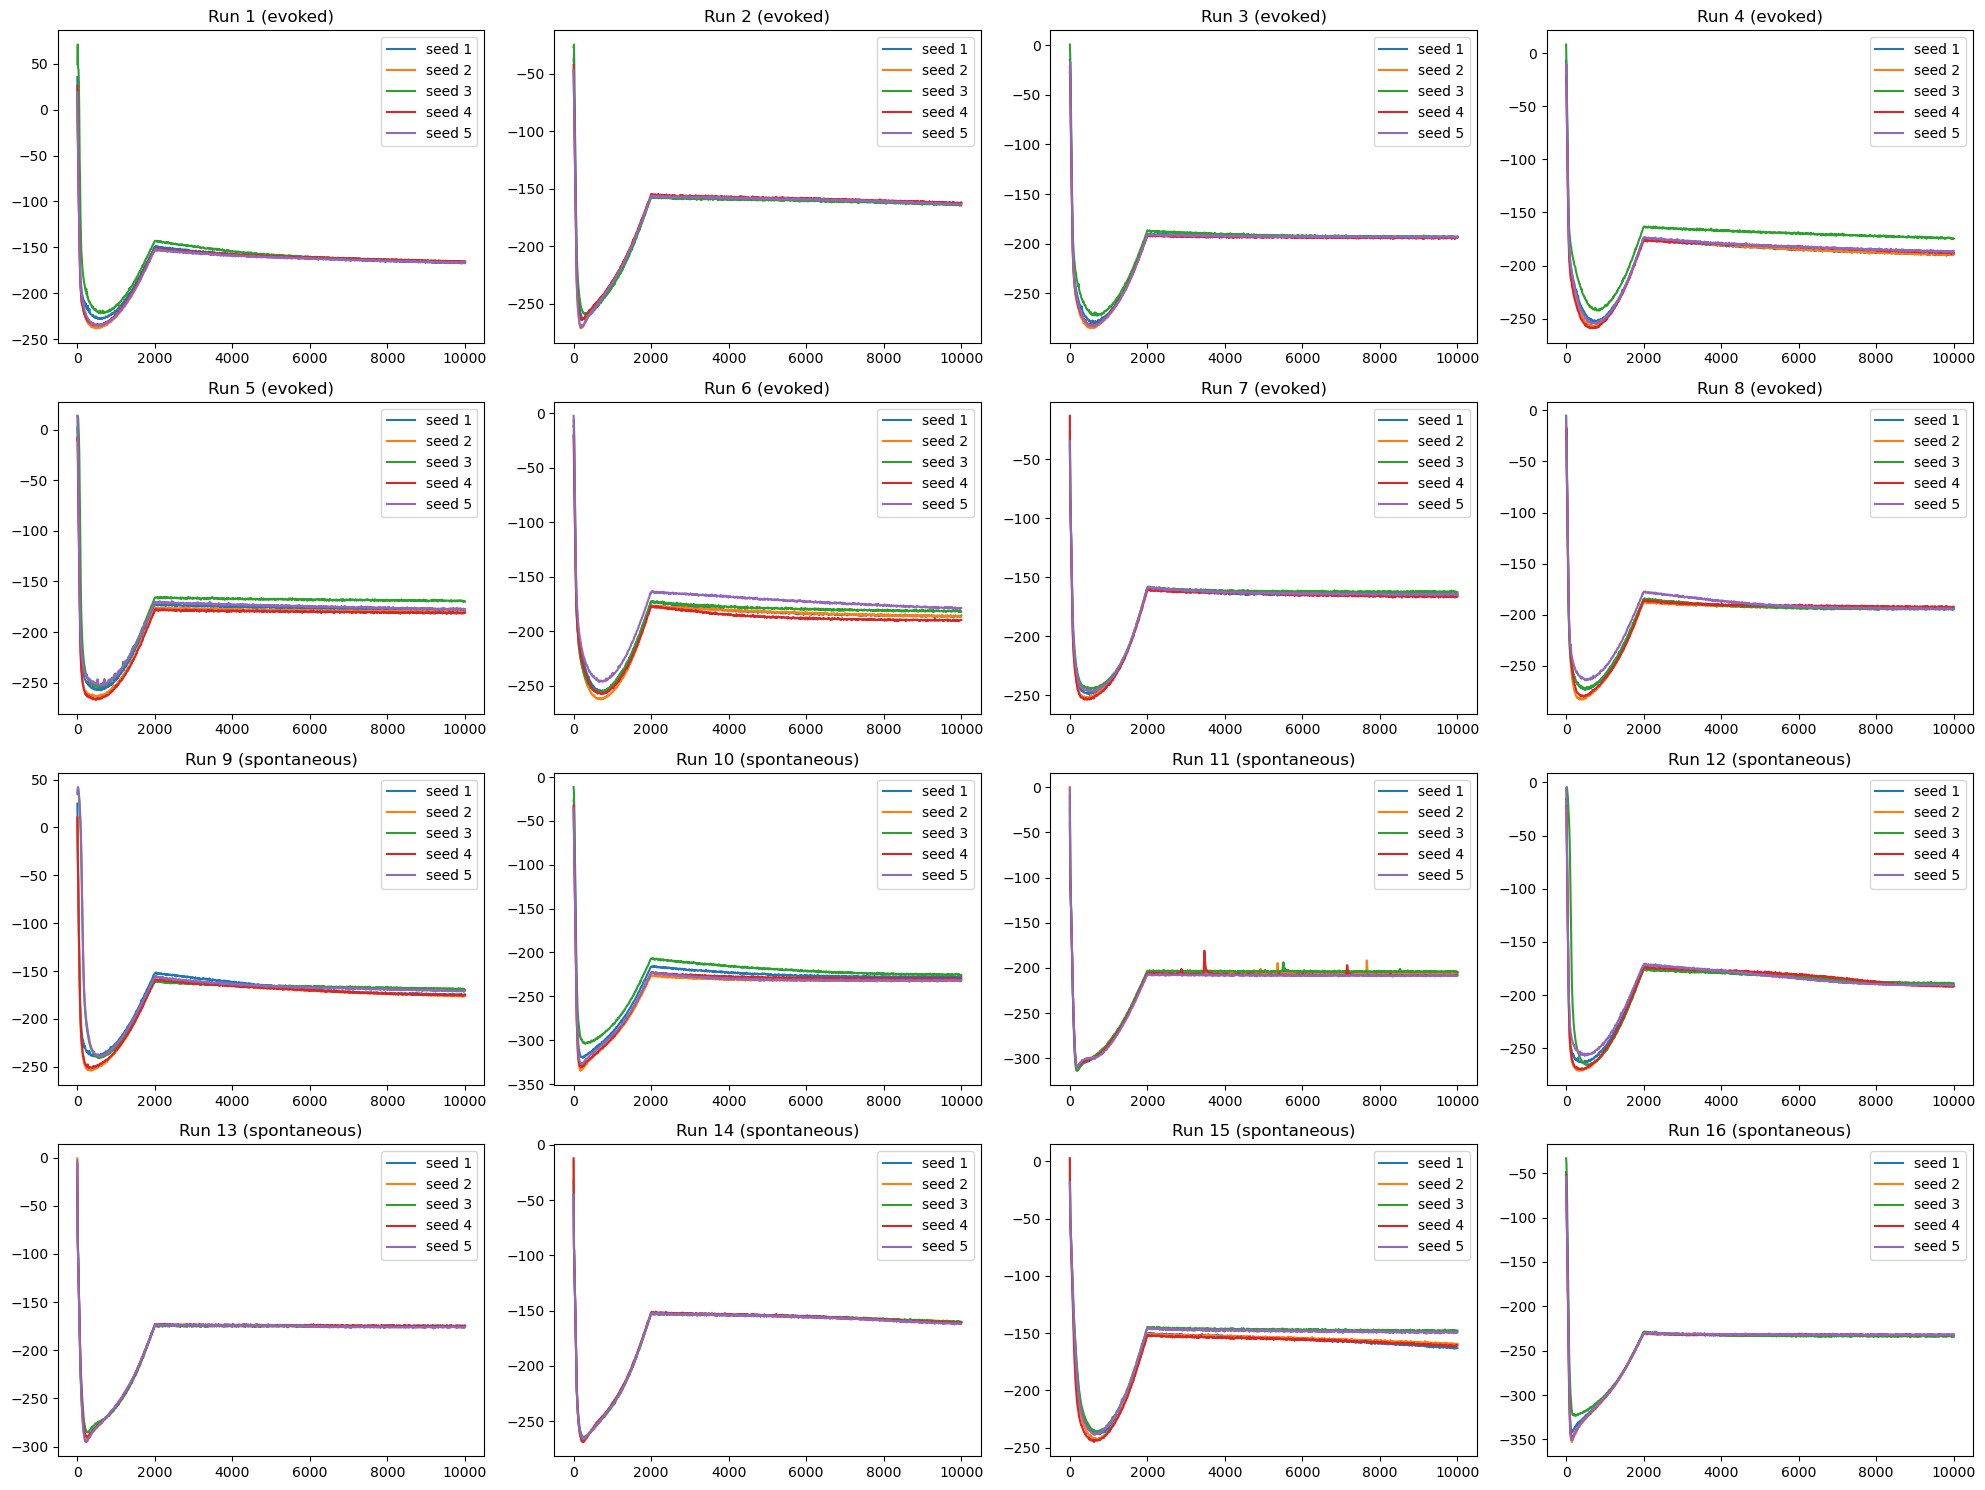

In [ ]:
#plot all the loss traces. subplot per run and line per seed
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i in range(1,17):
    ax = axs[(i-1)//4, (i-1)%4]
    for j in range(1,6):
        if loss_traces[(i,j)] is not None:
            ax.plot(loss_traces[(i,j)][:,0],loss_traces[(i,j)][:,-1], label=f'seed {j}')
    ax.set_title(f'Run {i} ({paradigm_[i]})')
    ax.legend()
plt.tight_layout()
plt.show()

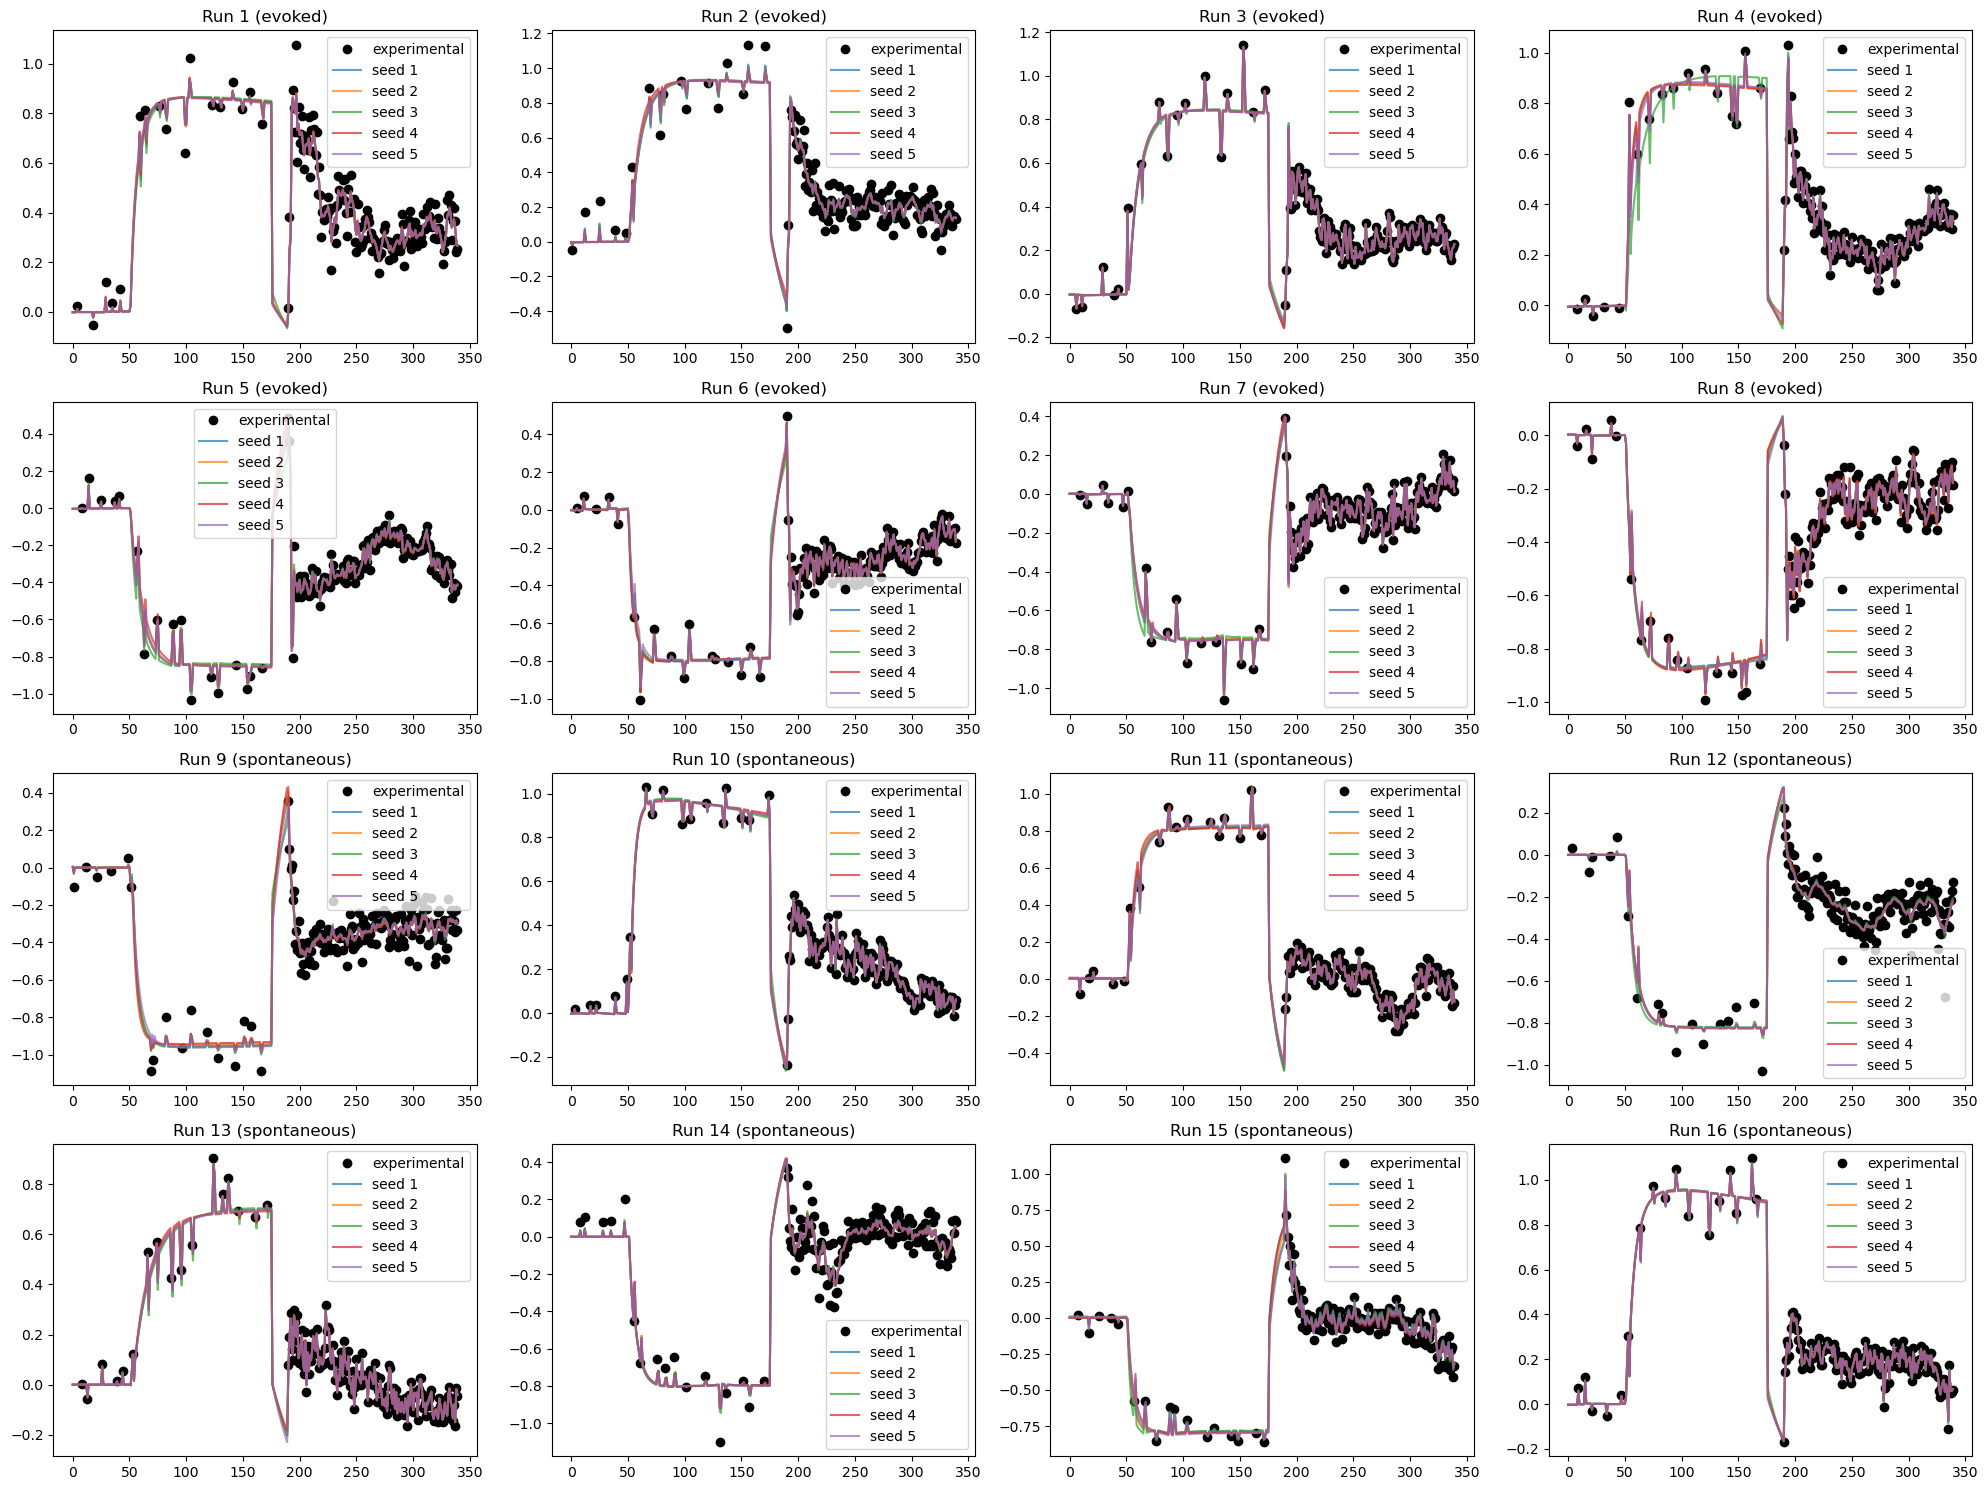

In [ ]:
#plot output traces vs experimental data. subplot per run and line per seed
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i in range(1,17):
    ax = axs[(i-1)//4, (i-1)%4]
    ax.plot(exp_datasets[i-1], 'o', label='experimental', color='black', linewidth=2)
    for j in range(1,6):
        if output_traces[(i,j)] is not None:
            ax.plot(output_traces[(i,j)], label=f'seed {j}', alpha=0.7)
    ax.set_title(f'Run {i} ({paradigm_[i]})')
    ax.legend()
plt.tight_layout()
plt.show()

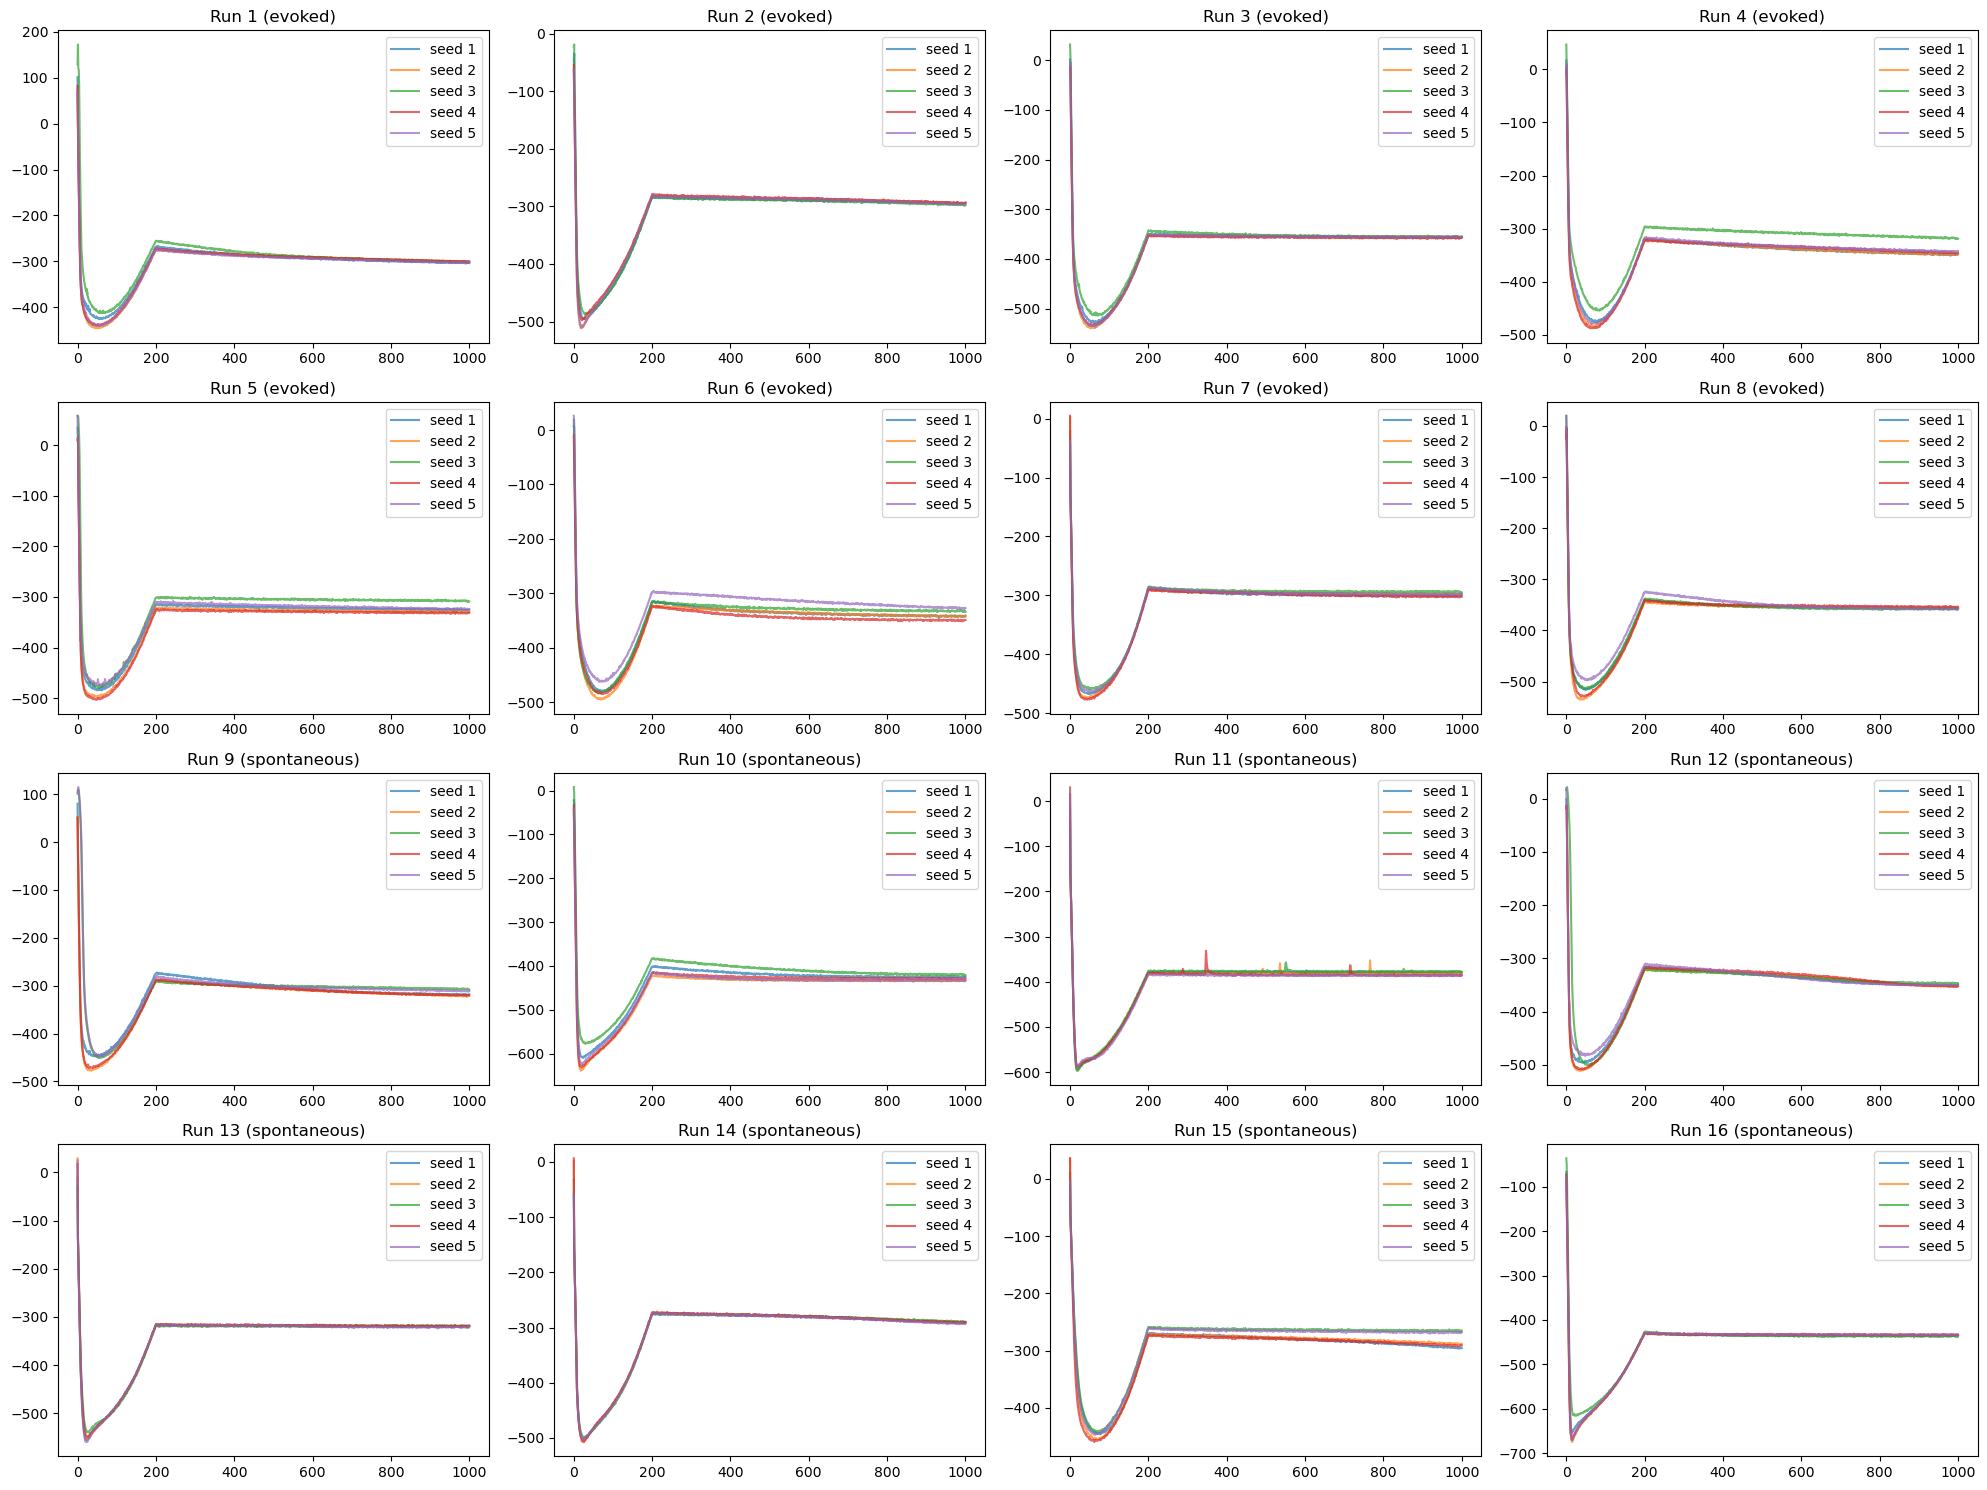

In [ ]:
k = 6
VALID_AFTER = 2000
best_bics = []
best_seeds = []
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i in range(1,17):
    ax = axs[(i-1)//4, (i-1)%4]
    n = np.sum(~np.isnan(exp_datasets[i-1]))
    # sum(~np.isnan(exp_data))
    these_bics = []
    best_bic = None
    best_seed = None
    for j in range(1,6):
        if output_traces[(i,j)] is not None:
            nll = loss_traces[(i,j)][:,1] * (n if LOSS_IS_PER_SAMPLE else 1)
            bic = 2*nll + k * np.log(n)
            if np.max(loss_traces[(i,j)][:,0]) > VALID_AFTER:
                best_bic, best_seed = (bic[-1], j) if best_bic is None or bic[-1] < best_bic else (best_bic, best_seed)
                #TODO: remove the next
                these_bics.append(bic[-1])
            ax.plot(bic, label=f'seed {j}', alpha=0.7)
    # best_bics.append(min(these_bics) if len(these_bics)>0 else None)
    best_bics.append(best_bic)
    best_seeds.append(best_seed)
    ax.set_title(f'Run {i} ({paradigm_[i]})')
    ax.legend()
plt.tight_layout()
plt.show()

# for ii in range(1,17):
#     plt.subplot(4,4,1 if ii<8 else 2)
#     n = sum(~np.isnan(exp_data))
#     nll = loss_traces[ii][:,1] * (n if LOSS_IS_PER_SAMPLE else 1)
#     iters = loss_traces[ii][:,0]
#     bic = 2*nll + k * np.log(n)
#     plt.plot(iters,bic, label=f'{result_dirs[ii]} (final: {bic[-1]:.1f})')
#     clnn_bics.append(bic[-1])
#     plt.ylim([-500,-200])

In [ ]:
#plot every result in a separate subplot overlayed with     exp_data
plt.figure(figsize=(12, 12))
for ii, result_dir in enumerate(result_dirs):
    # plt.subplot(2, len(result_dirs)//2, ii+1)
    plt.subplot(4, 4, ii+1)
    plt.plot(output_traces[ii], '.-' , label='model_output', linewidth=0.3)
    plt.plot(exp_datasets[ii],'o', label='exp_data', linewidth=1, alpha=0.5)
    plt.title(result_dir)
    plt.ylim([-0.7,1.3])
    plt.legend()
    rmse = np.sqrt(np.nanmean((output_traces[ii] - exp_datasets[ii])**2))
    plt.text(0.5, 0.1, f'RMSE: {rmse:.3f},\n neg-elbo: {loss_traces[ii][-1,1]:.3f}\n neg-elbo-min: {loss_traces[ii][201:,1].min():.3f}', transform=plt.gca().transAxes, ha='center')
plt.show()

NameError: name 'result_dirs' is not defined

<Figure size 1200x1200 with 0 Axes>

Text(0, 0.5, 'BIC difference (CLNN - COIN) [nats], negative = we are better')

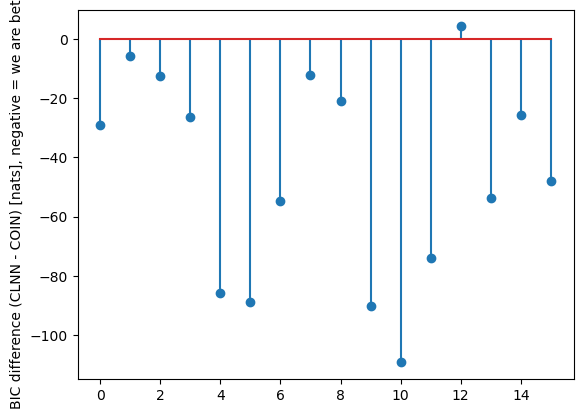

In [ ]:
delta_bic = np.array(np.array(best_bics)-coin_bics)
plt.stem(delta_bic, 'o')
plt.ylabel('BIC difference (CLNN - COIN) [nats], negative = we are better')
# np.savetxt('delta_bics.txt', delta_bic)

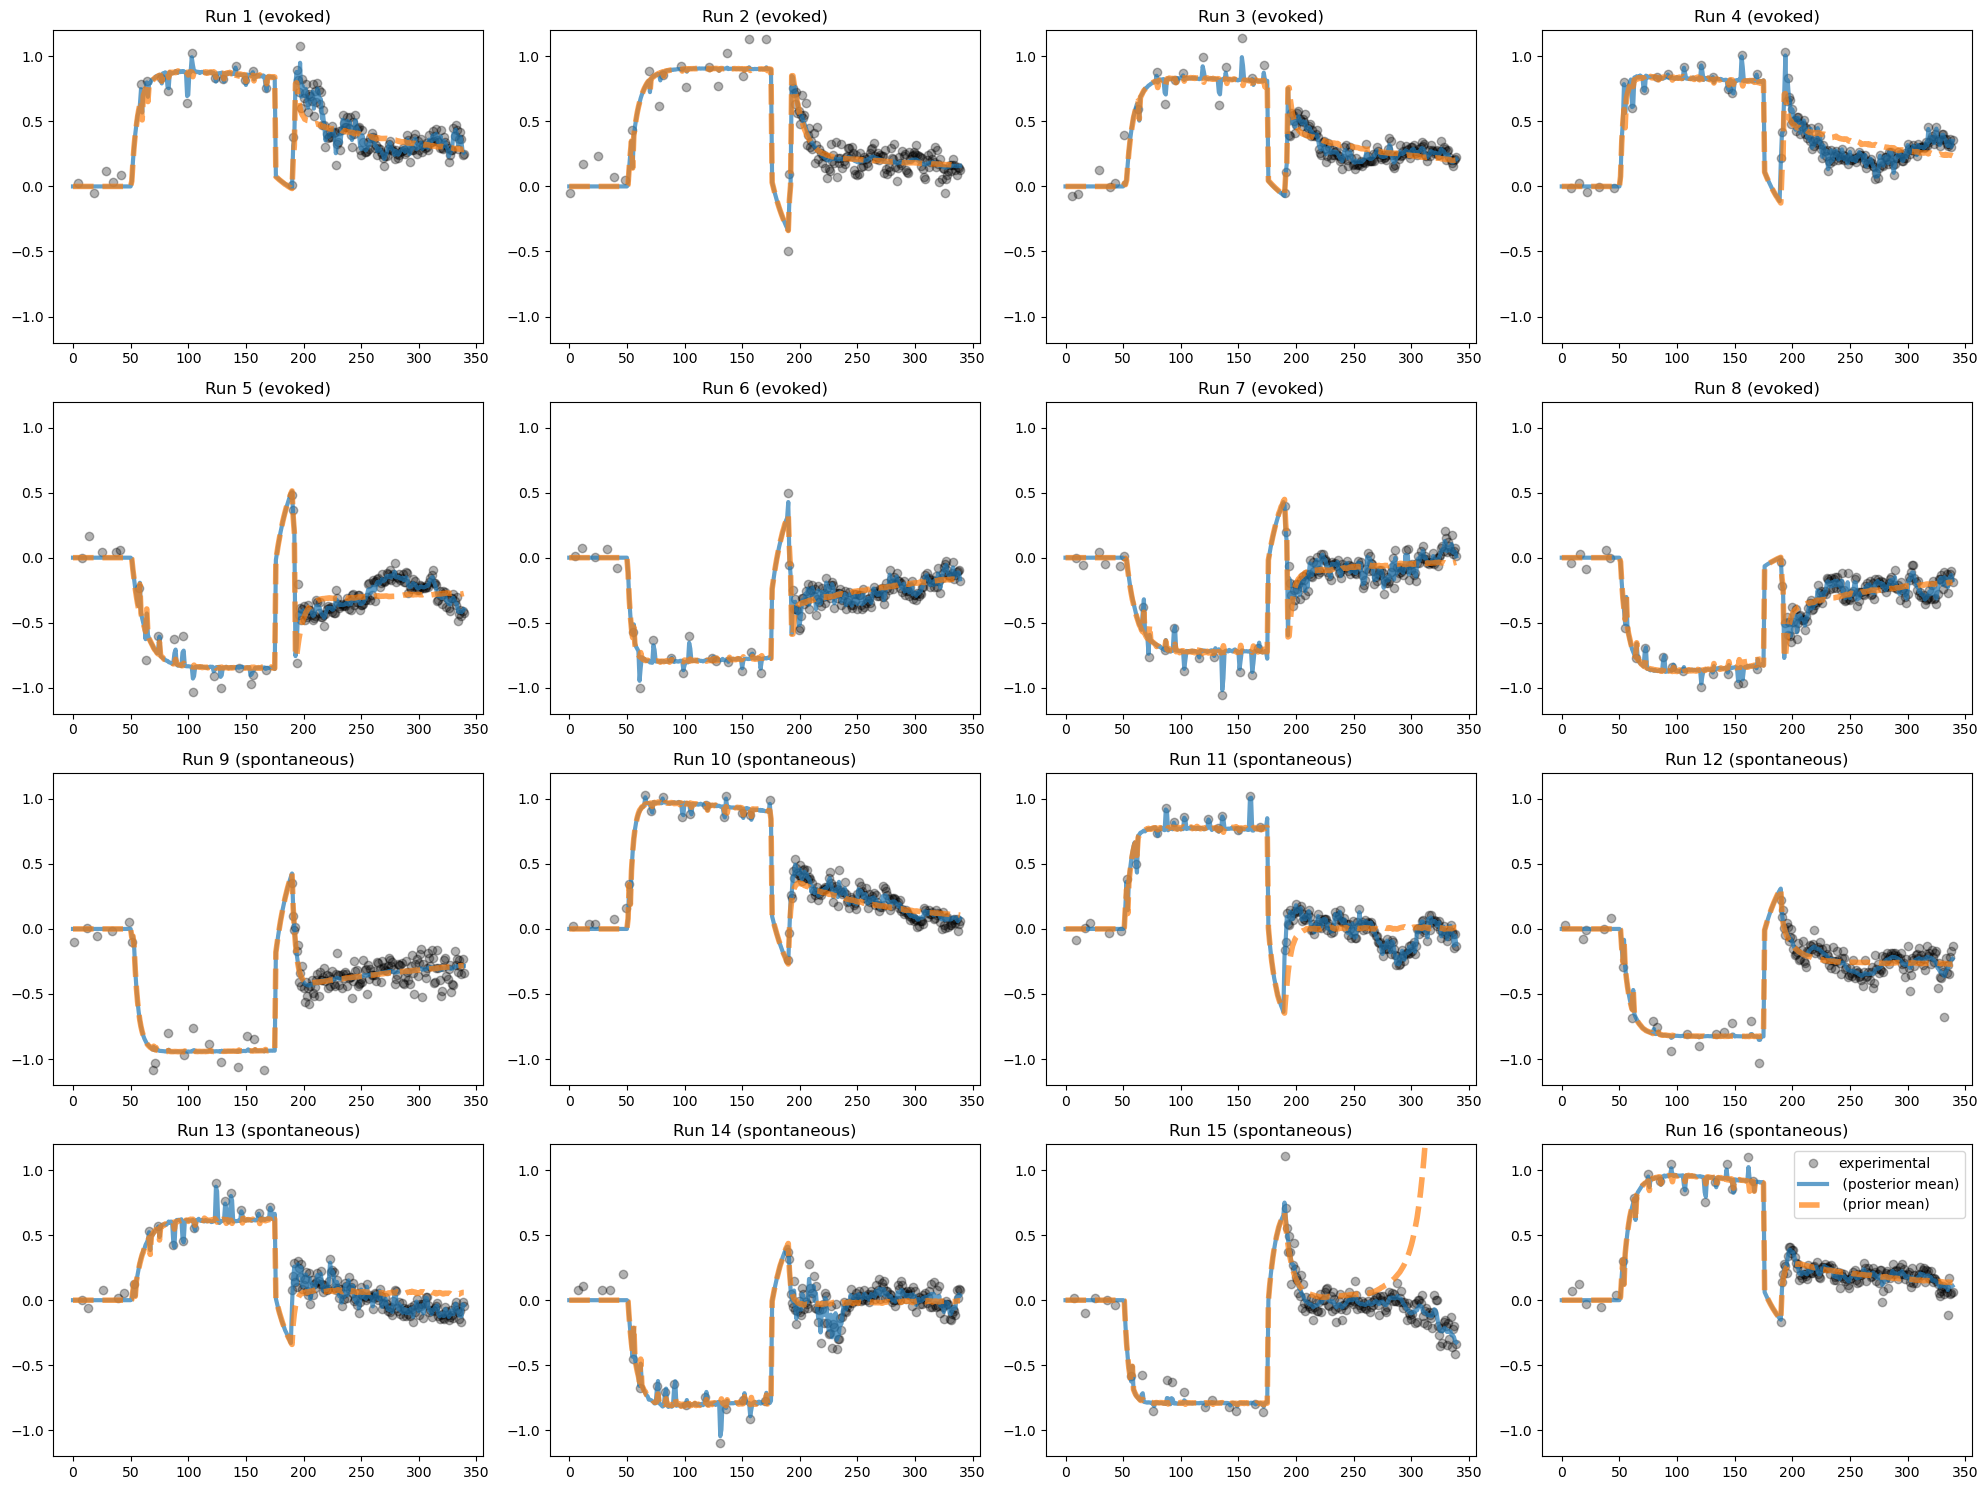

In [ ]:
#plot output traces vs experimental data. subplot per run and line per seed
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i in range(1,17):
    ax = axs[(i-1)//4, (i-1)%4]
    ax.plot(exp_datasets[i-1], 'o', label='experimental', color='black', linewidth=2, alpha=0.3)
    j = best_seeds[i-1]
    if output_traces[(i,j)] is not None:
        # ax.plot(output_traces[(i,j)], label=f'seed {j}', alpha=0.7)
        prior_a = prior_out_batch[(i,j)]['as']
        posterior_a = posterior_out_batch[(i,j)]['as']
        ax.plot(np.mean(posterior_a, axis=1), label=f' (posterior mean)', linestyle='-', alpha=0.7, linewidth=3)
        ax.plot(np.mean(prior_a, axis=1), label=f' (prior mean)', linestyle='--', alpha=0.7, linewidth=4)

    ax.set_title(f'Run {i} ({paradigm_[i]})')
    ax.set_ylim([-1.2,1.2])
    # ax.legend()
plt.tight_layout()
ax.legend()
plt.show()

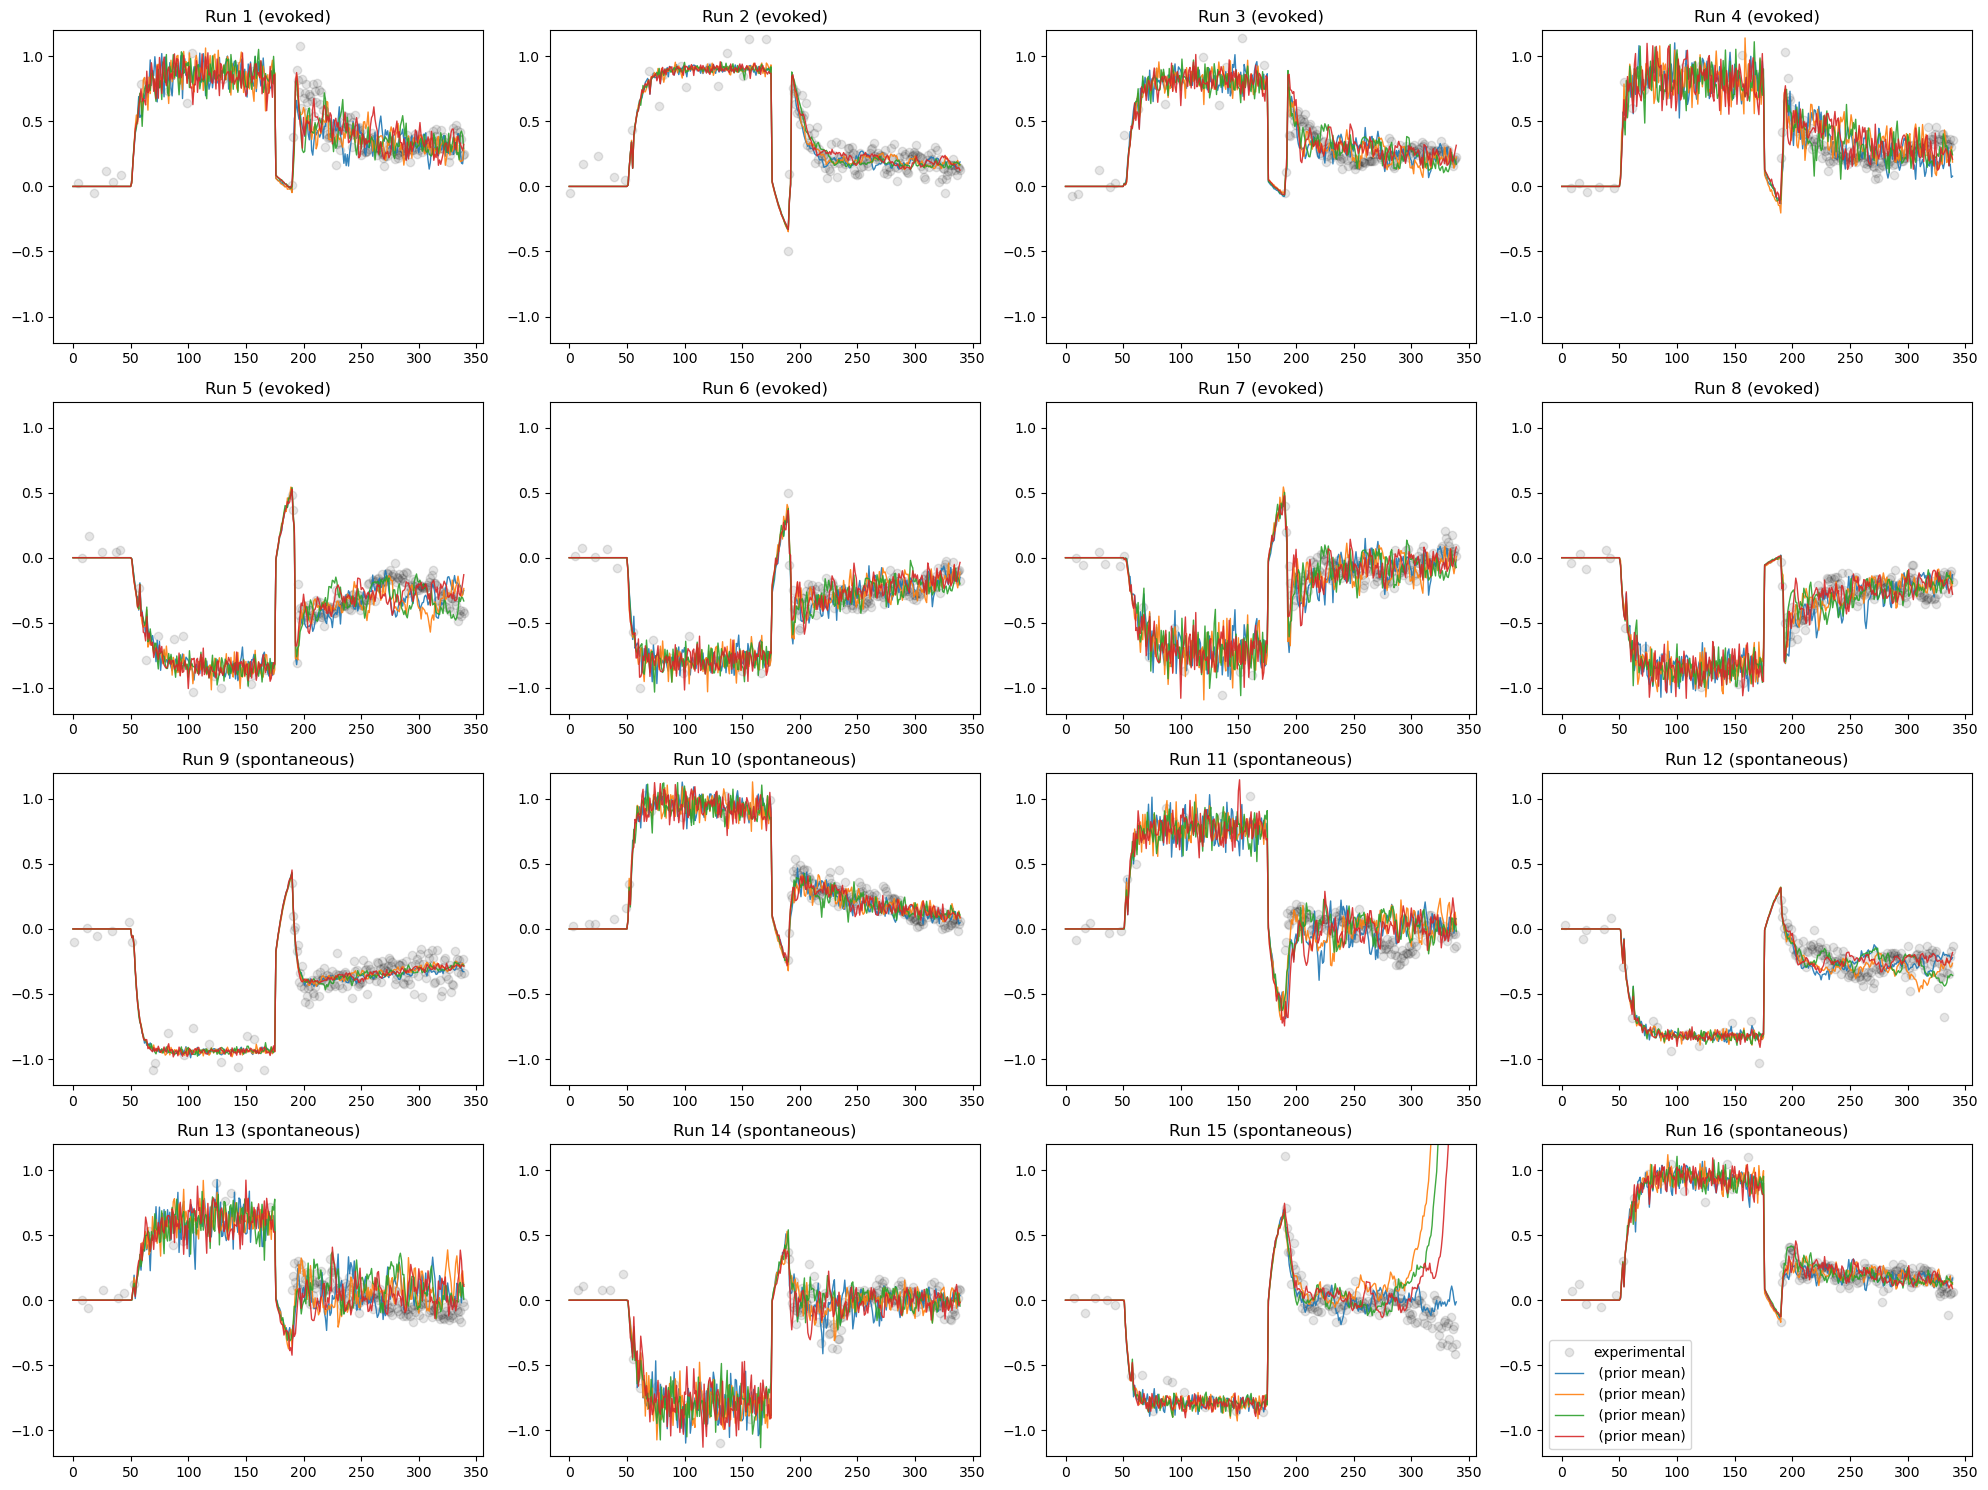

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i in range(1,17):
    ax = axs[(i-1)//4, (i-1)%4]
    ax.plot(exp_datasets[i-1], 'o', label='experimental', color='black', linewidth=2, alpha=0.1)
    j = best_seeds[i-1]
    if output_traces[(i,j)] is not None:
        # ax.plot(output_traces[(i,j)], label=f'seed {j}', alpha=0.7)
        prior_a = prior_out_batch[(i,j)]['as']
        posterior_a = posterior_out_batch[(i,j)]['as']
        # ax.plot(np.mean(posterior_a, axis=1), label=f' (posterior mean)', linestyle='-', alpha=0.7, linewidth=3)
        ax.plot(prior_a[:,:4], label=f' (prior mean)', linestyle='-', alpha=0.9, linewidth=1)

    ax.set_title(f'Run {i} ({paradigm_[i]})')
    ax.set_ylim([-1.2,1.2])
    # ax.legend()
plt.tight_layout()
ax.legend()
plt.show()

In [ ]:
# trajs1 = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp/pred_a_batch.npz')
# trajs1prior = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp/prior_a_batch.npz')

trajs1 = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/realthing403finalpreds/run1_seed1/pred_a_batch.npz')
trajs1prior = np.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/realthing403finalpreds/run1_seed1/prior_a_batch.npz')

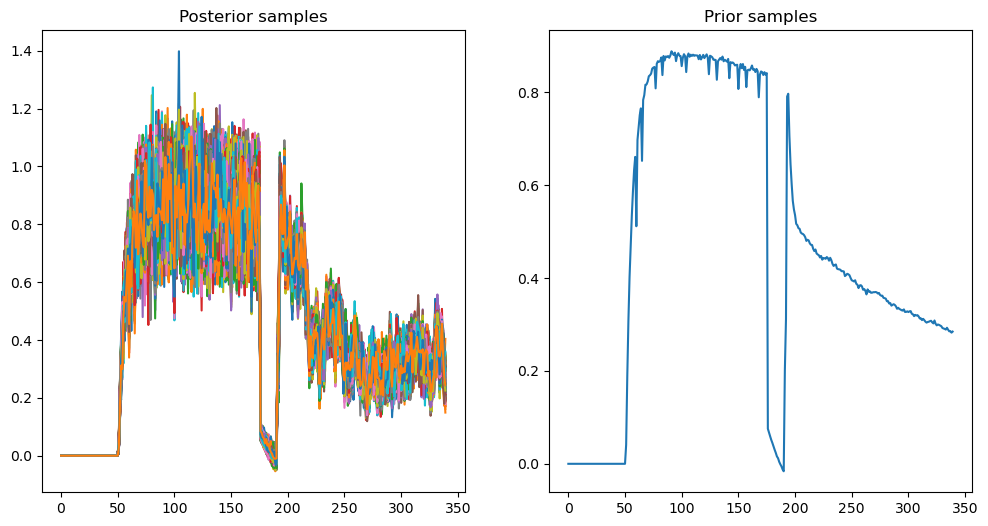

In [ ]:
plt.subplots(1,2, figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Posterior samples')
_ = plt.plot(trajs1['as'])
plt.subplot(1,2,2)
plt.title('Prior samples')
_ = plt.plot(np.mean(trajs1prior['as'],axis=1))

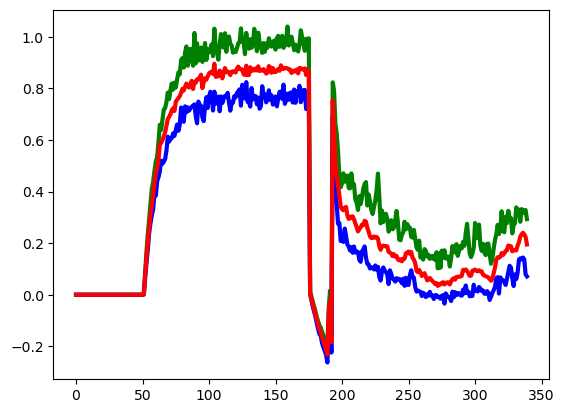

In [ ]:
plt.plot(trajs['as'].max(axis=1), 'g', linewidth=3)
plt.plot(trajs['as'].min(axis=1), 'b', linewidth=3)
plt.plot(trajs['as'].mean(axis=1), 'r', linewidth=3)

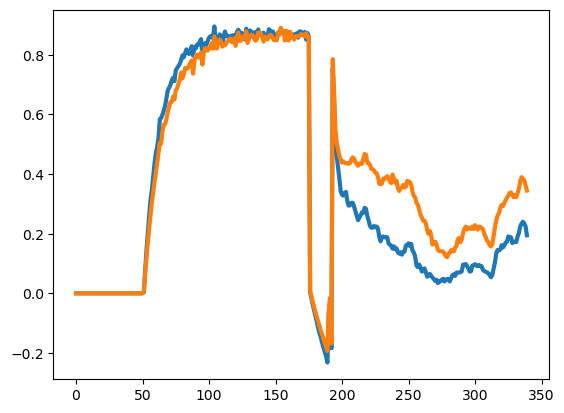

In [ ]:
for these_trajs in [trajs1, trajs2]:
    # plt.plot(these_trajs['as'].max(axis=1), 'g', linewidth=3)
    # plt.plot(these_trajs['as'].min(axis=1), 'b', linewidth=3)
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)

/tmp/ipykernel_826573/3345047556.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


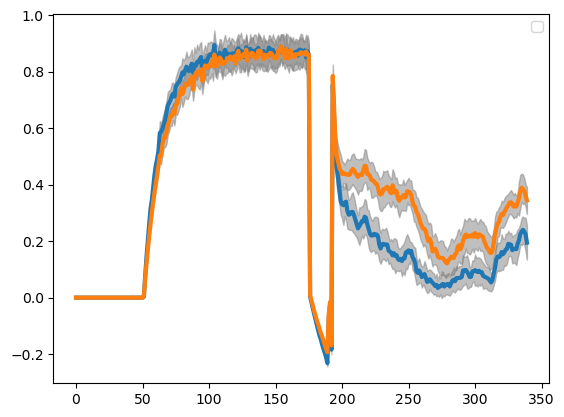

In [ ]:
for these_trajs in [trajs1, trajs2]:
#now plot as mean and shaded region between +/- stddev
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)
    stdtraj = these_trajs['as'].std(axis=1)
    plt.fill_between(np.arange(len(stdtraj)), these_trajs['as'].mean(axis=1)-stdtraj, these_trajs['as'].mean(axis=1)+stdtraj, color='gray', alpha=0.5)
    plt.legend()


In [ ]:
#ranksum of timepoint 225 on the two trajs
import scipy.stats as stats
o = stats.ranksums(trajs1['as'][225, :], trajs2['as'][225, :])
print(o)

RanksumsResult(statistic=-6.7001497902314435, pvalue=2.082060062705088e-11)


/tmp/ipykernel_826573/3789321778.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(180.0, 200.0)

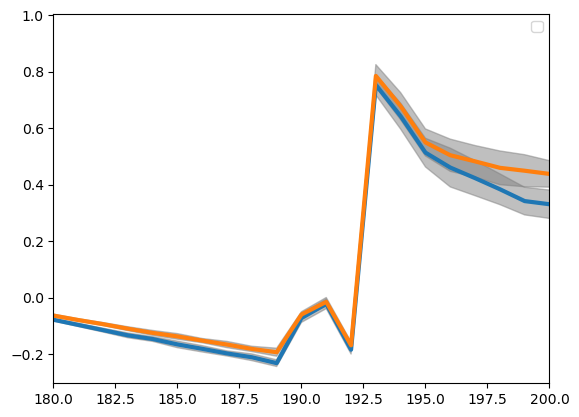

In [ ]:
for these_trajs in [trajs1, trajs2]:
#now plot as mean and shaded region between +/- stddev
    plt.plot(these_trajs['as'].mean(axis=1), linewidth=3)
    stdtraj = these_trajs['as'].std(axis=1)
    plt.fill_between(np.arange(len(stdtraj)), these_trajs['as'].mean(axis=1)-stdtraj, these_trajs['as'].mean(axis=1)+stdtraj, color='gray', alpha=0.5)
    plt.legend()
plt.xlim([180,200])


In [ ]:
sr_df = pd.read_csv('/homes/ar2342/frogs_project/data/COIN_data/trial_data_spontaneous_recovery_participant1.csv')
mu_df = pd.read_csv('/homes/ar2342/frogs_project/data/COIN_data/trial_data_memory_updating_participant1.csv')

In [ ]:
sr_df.columns

Index(['BlockName', 'BlockTrial', 'FieldConstants_1', 'FieldConstants_2',
       'FieldType', 'MissTrial', 'RestFlag', 'TrialNumber', 'TargetPosition_1',
       'TargetPosition_2', 'MovementReactionTime', 'MovementDurationTime',
       'Adaptation'],
      dtype='object')

In [ ]:
mu_df.columns

Index(['BlockName', 'BlockTrial', 'ControlPoint', 'FieldConstants_1',
       'FieldConstants_2', 'FieldType', 'MissTrial', 'RestFlag', 'TrialNumber',
       'TargetPosition_1', 'TargetPosition_2', 'MovementReactionTime',
       'MovementDurationTime', 'Adaptation'],
      dtype='object')

In [ ]:
# check for any names that are in sr_df but not in mu_df and vice versa
print(set(sr_df.columns) - set(mu_df.columns))
print(set(mu_df.columns) - set(sr_df.columns))

set()
{'ControlPoint'}


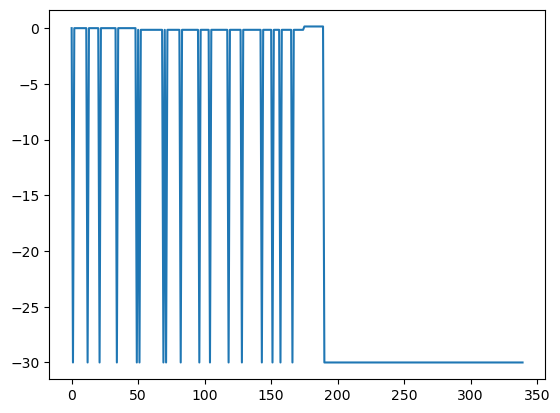

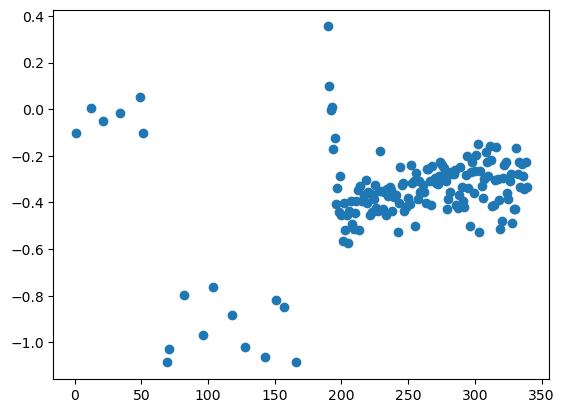

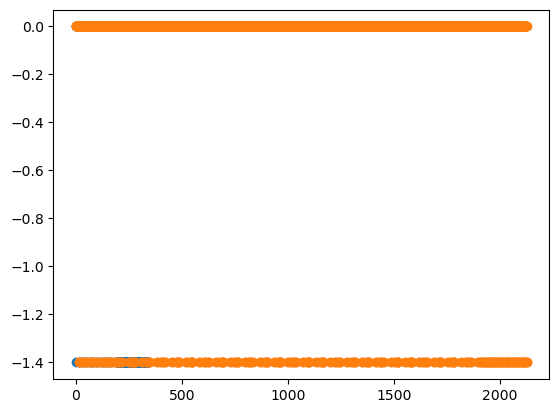

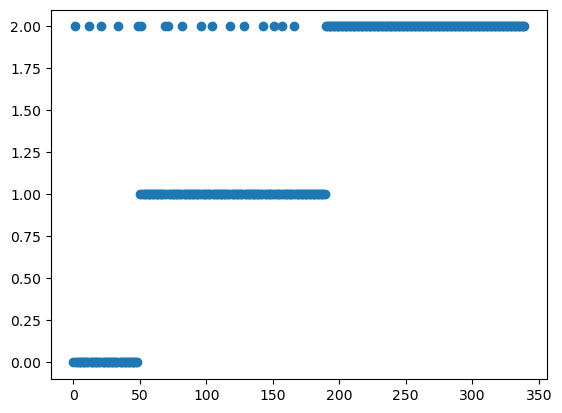

In [ ]:
plt.plot(sr_df.FieldConstants_1)
plt.figure()
plt.plot(sr_df.Adaptation, 'o')
plt.figure()
plt.plot(sr_df.FieldConstants_2, 'o')
plt.plot(mu_df.FieldConstants_2, 'o')

plt.figure()
plt.plot(sr_df.FieldType, 'o')
# plt.plot(mu_df.FieldType, 'x')

In [ ]:
def load_subject_data(filename, ff_mult = 1./0.15):
    df = pd.read_csv(filename)
    a = df.Adaptation.to_numpy()
    y = ff_mult * df.FieldConstants_1.to_numpy()
    channel_trials  = np.logical_not(np.isnan(a))
    y[channel_trials] = np.nan
    q = df.ControlPoint.to_numpy() if 'ControlPoint' in df.columns else np.zeros_like(a)

    return a, y, q

In [ ]:
# a,y,q = load_subject_data('/homes/ar2342/frogs_project/data/COIN_data/trial_data_spontaneous_recovery_participant1.csv')
a,y,q = load_subject_data('/homes/ar2342/frogs_project/data/COIN_data/trial_data_memory_updating_participant1.csv')

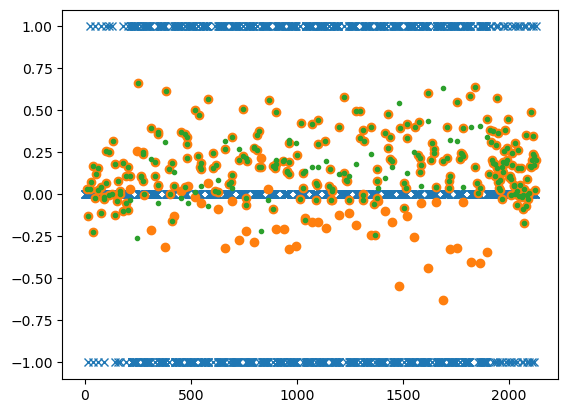

In [ ]:
plt.plot(y,'x')
plt.plot(a,'o')
plt.plot(a*q,'.')

In [ ]:
q

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
temp_pred_a  = np.loadtxt(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp11/pred_a.txt')
temp_params  = torch.load(f'/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/temp11/params.pt')



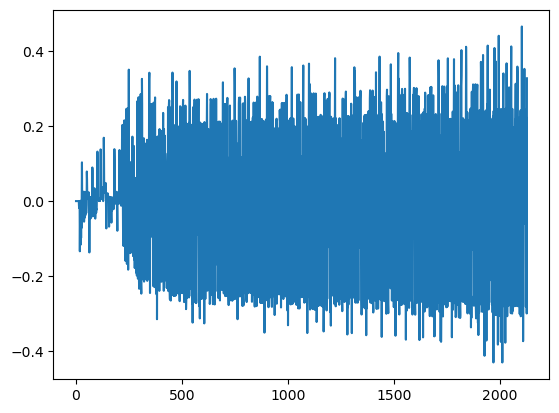

In [ ]:
plt.plot(temp_pred_a, label='model')

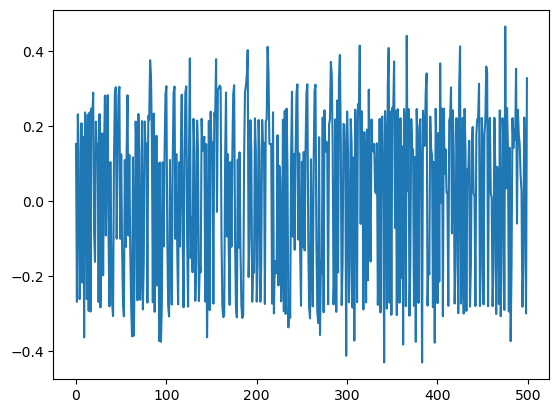

In [ ]:
plt.plot(temp_pred_a[-500:], label='model')

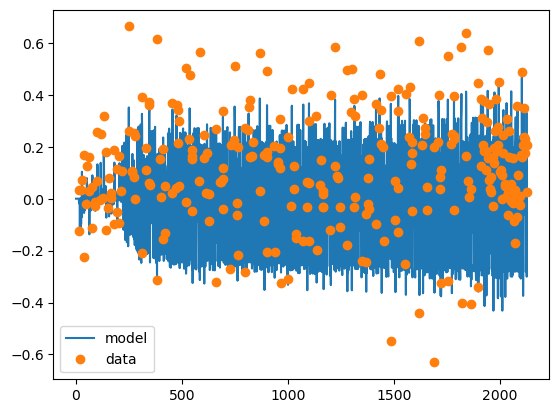

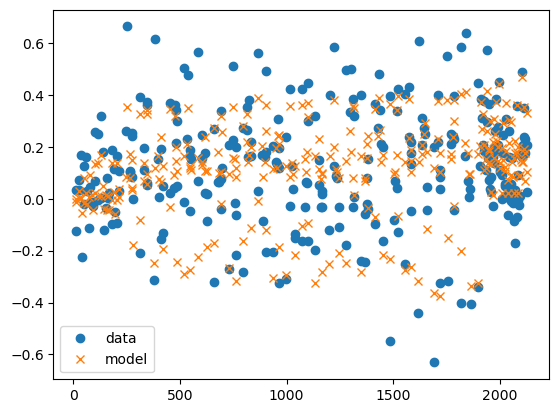

In [ ]:
x_a = np.arange(len(temp_pred_a))
plt.plot(x_a, temp_pred_a, label='model')
plt.plot(x_a, a, 'o', label='data')
plt.legend()
plt.figure()
valas = np.logical_not(np.isnan(a))
plt.plot(x_a[valas], a[valas], 'o', label='data')
plt.plot(x_a[valas], temp_pred_a[valas],'x', label='model')
plt.legend()


(100.0, 400.0)

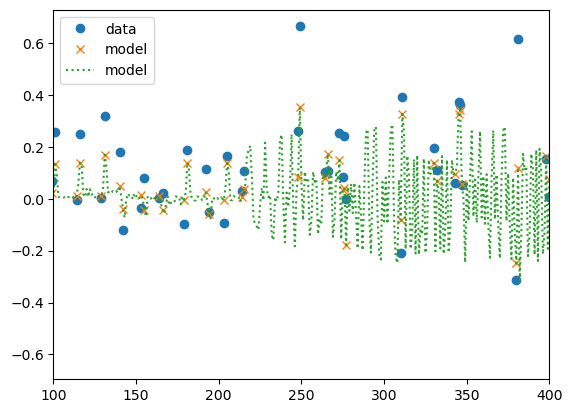

In [ ]:
valas = np.logical_not(np.isnan(a))
plt.plot(x_a[valas], a[valas], 'o', label='data')
plt.plot(x_a[valas], temp_pred_a[valas],'x', label='model')
plt.plot(x_a, temp_pred_a,':', label='model')
plt.legend()
plt.xlim([100,400])

(2000.0, 2128.0)

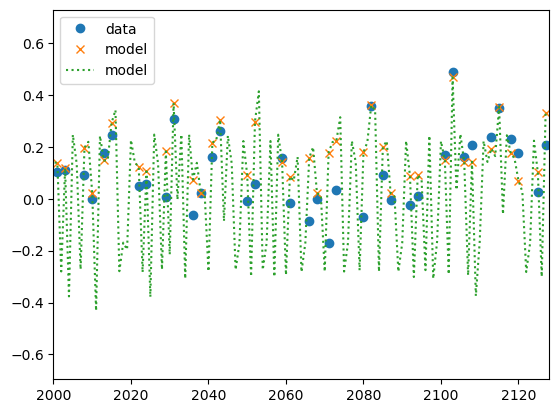

In [ ]:
valas = np.logical_not(np.isnan(a))
plt.plot(x_a[valas], a[valas], 'o', label='data')
plt.plot(x_a[valas], temp_pred_a[valas],'x', label='model')
plt.plot(x_a, temp_pred_a,':', label='model')
plt.legend()
plt.xlim([2000,2128])

In [ ]:
temp_params

OrderedDict([('gen.log_learning_rate', tensor([-6.1842], device='cuda:0')),
             ('gen.log_learning_rate_decay',
              tensor([0.2759], device='cuda:0')),
             ('gen.sigma_b', tensor([-0.2465], device='cuda:0')),
             ('gen.output_scale', tensor([0.8453], device='cuda:0')),
             ('gen.log_weight_decay', tensor([0.0001], device='cuda:0')),
             ('gen.q_scale', tensor([0.6957], device='cuda:0')),
             ('gen.sigma_x', tensor([0.5684], device='cuda:0')),
             ('gen.tauqlpf_m1', tensor([-1.3040], device='cuda:0')),
             ('gen._z_biases',
              tensor([-0.6974, -1.8688, -0.8832, -1.6627, -0.4324,  0.9505,  0.6620,  0.0446,
                       0.5720,  2.1951, -0.2474, -1.3831,  0.0602, -0.2431,  1.3181,  0.5211,
                      -0.6087,  0.1000, -0.8960, -0.9373, -0.2666,  1.5304,  0.5584, -0.9451,
                       0.1321,  1.2452,  0.1467, -0.4605,  0.6020,  1.3719, -1.9693,  0.9137,
             

In [ ]:
# a,y,q = load_subject_data('/homes/ar2342/frogs_project/data/COIN_data/trial_data_spontaneous_recovery_participant1.csv')
a,y,q = load_subject_data('/homes/ar2342/frogs_project/data/COIN_data/trial_data_memory_updating_participant1.csv')

In [ ]:
y

array([ 0.,  0.,  0., ..., nan,  1., nan])

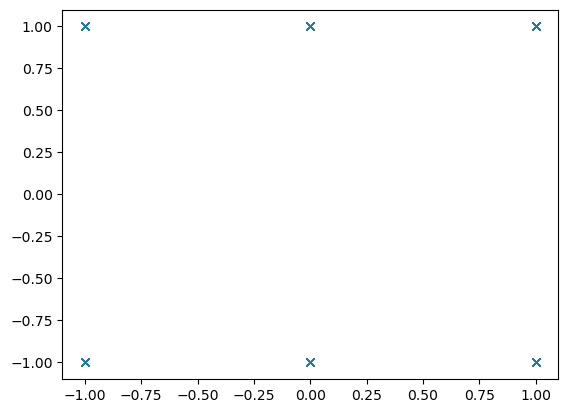

In [ ]:
plt.plot(y[-500:], q[-500:], 'x')

(500.0, 600.0)

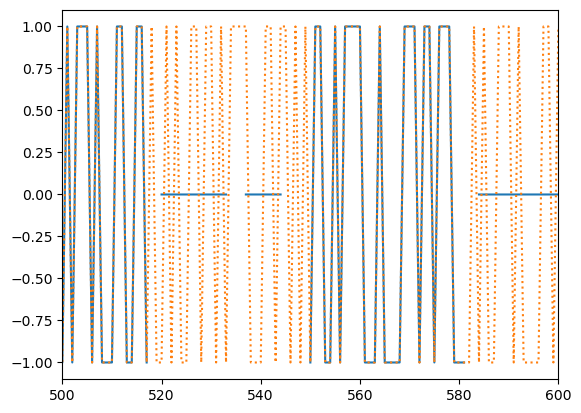

In [ ]:
plt.plot(y)
plt.plot(q,':')
plt.xlim([500,600])

(2000.0, 2100.0)

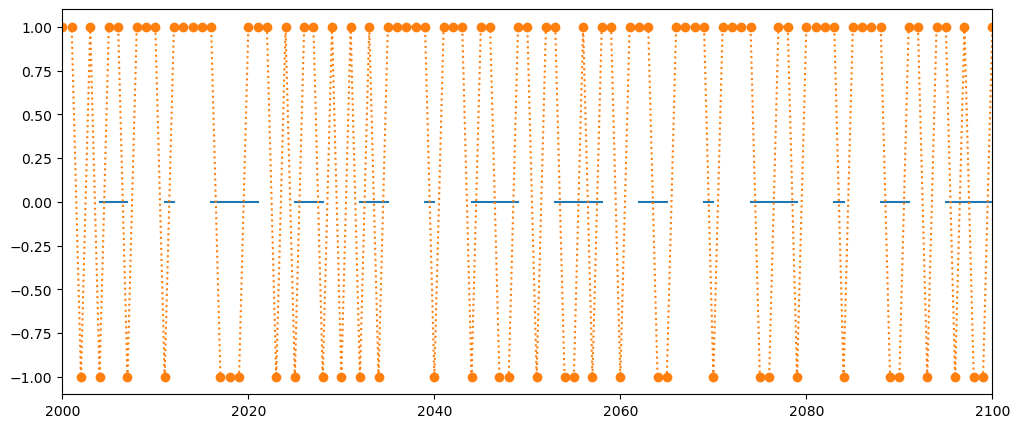

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y)
plt.plot(q,':o')
plt.xlim([2000,2100])

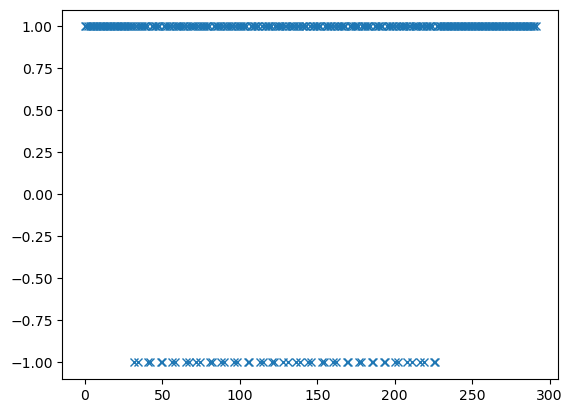

In [ ]:
plt.plot(q[np.isnan(y)], 'x')